## 교차 검증
### 과적합 문제점을 개선하기 위해 교차 검증을 이용
##### KFold 교차검증과 Stratified K 폴드

### 1. KFold 교차검증
- KFold 교차검증은 가장 보편적으로 사용되는 교차 검증 기법
- K개의 데이터 폴드 세트를 만들어서 K번 만큼 각 폴트 세트에 학습과 검증 평가를 반복적으로 수행하는 방법
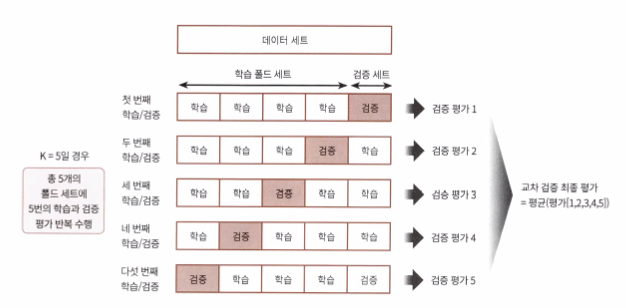


In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
import numpy as np

In [13]:
# 데이터 로드
iris = load_iris()
features = iris.data
label = iris.target

# 모델 객체 생성
df_clf = DecisionTreeClassifier()

# 붓꽃 데이터 세트 크기
print('붓꽃 데이터 세트 크기 :', features.shape[0])

붓꽃 데이터 세트 크기 : 150


In [14]:
# 5개의 폴드 세트로 분리하는 KFold 객체
kfold = KFold(n_splits=5)

# 폴드별 정확도를 담을 리스트 객체 생성
cv_accuracy = []

- 붓꽃 데이터 세트는 150개
- 5개의 폴드 데이터 세트로 분리한다면
- 4/5인 120개의는 학습용, 1/5인 30개는 검증 데이터 세트로 분할 된다

In [15]:
from sklearn.metrics import accuracy_score
# 몇번째 반복인지 보기 위한 변수선언
n_iter = 0

# KFold 객체의 split()을 호출하면 폴드 별 학습용,검증용 데이터의 로우 인덱스를 array로 반환
for train_index, test_index in kfold.split(features):

  # kfold.split()으로 반환된 인덱스를 이용해 학습용, 검증용 테스트 데이터 추출
  X_train, X_test = features[train_index], features[test_index]
  y_train, y_test = label[train_index], label[test_index]
  # 학습 및 예측
  df_clf.fit(X_train,y_train)
  pred = df_clf.predict(X_test)
  n_iter += 1

  # 반복시 마다 정확도 측정
  accuracy = np.round(accuracy_score(y_test,pred),4)

  # 학습/검증 데이터 크기 확인
  train_size = X_train.shape[0]
  test_size = X_test.shape[0]
  print(f'{n_iter} 교차 검증 정확도 :{accuracy}, 학습데이터크기:{train_size}, 검증데이터크기:{test_size}')
  print(f'{n_iter} 검증 세트 인덱스 :{test_index}')

  # 5개번의 교차검증 정확도 append
  cv_accuracy.append(accuracy)

# 개별 정확도를 합하여 평균 정확도 계산
print('\n## 평균 검증 적확도 :', np.mean(cv_accuracy))


1 교차 검증 정확도 :1.0, 학습데이터크기:120, 검증데이터크기:30
1 검증 세트 인덱스 :[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
2 교차 검증 정확도 :0.9667, 학습데이터크기:120, 검증데이터크기:30
2 검증 세트 인덱스 :[30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]
3 교차 검증 정확도 :0.8667, 학습데이터크기:120, 검증데이터크기:30
3 검증 세트 인덱스 :[60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]
4 교차 검증 정확도 :0.9333, 학습데이터크기:120, 검증데이터크기:30
4 검증 세트 인덱스 :[ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]
5 교차 검증 정확도 :0.8333, 학습데이터크기:120, 검증데이터크기:30
5 검증 세트 인덱스 :[120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]

## 평균 검증 적확도 : 0.9200000000000002


✔ 5번의 교차검증 정확도는 92% 정도

✔ 교차검증 시마다 검증 세트의 인덱스가 달라짐을 알 수 있다

### 2. Stratified K 폴드
- 불균형한 분포도를 가진 레이블(결정클래스) 데이터 집합을 위한 K 폴드 방식
- 이를 위해 Stratified K 폴드는 원본 데이터의 레이블 분포를 먼저 고려한 뒤 이 분포와 동일하게 학습과 검증 데이터 세트를 분배

In [16]:
# 먼저 k 폴드가 어떤 문제를 가지고 있는지 확인
import pandas as pd

iris = load_iris()
iris_df = pd.DataFrame(iris.data,columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df['label'].value_counts()

0    50
1    50
2    50
Name: label, dtype: int64

✔ 레이블 값은 0,1,2 값 모두 50개로 동일

✔ 이슈가 발생하는 현상을 도축하기 위해 3개의 폴드 세트를 KFold로 생성, 각 교차 검증 시마다 생성되는 학습/검증 레이블 데이터 값의 분포도 확인

In [21]:
# 3의 폴드 세트 생성
kfold = KFold(n_splits=3)
n_iter = 0

for train_index, test_index in kfold.split(iris_df):
  n_iter += 1
  label_train = iris_df['label'].iloc[train_index]
  label_test = iris_df['label'].iloc[test_index]
  print(f'## 교차검증 :{n_iter}')
  print('학습 레이블 데이터 분포:\n', label_train.value_counts())
  print('테스트 레이블 데이터 분포 :\n', label_test.value_counts())

## 교차검증 :1
학습 레이블 데이터 분포:
 1    50
2    50
Name: label, dtype: int64
테스트 레이블 데이터 분포 :
 0    50
Name: label, dtype: int64
## 교차검증 :2
학습 레이블 데이터 분포:
 0    50
2    50
Name: label, dtype: int64
테스트 레이블 데이터 분포 :
 1    50
Name: label, dtype: int64
## 교차검증 :3
학습 레이블 데이터 분포:
 0    50
1    50
Name: label, dtype: int64
테스트 레이블 데이터 분포 :
 2    50
Name: label, dtype: int64


✔ 교차 검증 마다 3개의 폴드 세트로 만들어지는 학습 레이블과 검증 레이블이 완전히 다른 값으로 추출

✔ 이런 유형으로 교차 검증 데이터 세트를 분할하면 검증 예측 정확도는 0이 될 수 밖에 없다

✔ Stratified K폴드는 이렇게 KFold로 분활된 레이블 데이터 세트가 전체 레이블 값의 분포도를 반영하지 못하는 문제를 해결해 준다

In [22]:
# 동일한 데이터 분할을 Stratified K Fold로 수행
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=3)
n_iter = 0

for train_index, test_index in skf.split(features, label):
  n_iter += 1
  label_train = iris_df['label'].iloc[train_index]
  label_test = iris_df['label'].iloc[test_index]
  print(f'## 교차검증 : {n_iter}')
  print('학습 레이블 데이터 분포 : \n', label_train.value_counts())
  print('테스트 레이블 데이터 분포 : \n', label_test.value_counts())

## 교차검증 : 1
학습 레이블 데이터 분포 : 
 2    34
0    33
1    33
Name: label, dtype: int64
테스트 레이블 데이터 분포 : 
 0    17
1    17
2    16
Name: label, dtype: int64
## 교차검증 : 2
학습 레이블 데이터 분포 : 
 1    34
0    33
2    33
Name: label, dtype: int64
테스트 레이블 데이터 분포 : 
 0    17
2    17
1    16
Name: label, dtype: int64
## 교차검증 : 3
학습 레이블 데이터 분포 : 
 0    34
1    33
2    33
Name: label, dtype: int64
테스트 레이블 데이터 분포 : 
 1    17
2    17
0    16
Name: label, dtype: int64


✔ 학습, 검증 레이블 0,1,2가 잘 할당 됐다

✔ 이렇게 분할 되야 레이블 값 0,1,2를 모두 학습 할 수 있고 검증 수행 할 수 있다

In [24]:
# StratifiedKFold 를 이용해 데이터를 분리하고 학습,정확도
df_clf = DecisionTreeClassifier(random_state=156)

skfold = StratifiedKFold(n_splits=3)
n_iter = 0
cv_accuracy = []

# StratifiedKFold의 split() 호출시 반드시 레이블 데이터 세트도 추가 입력 필요
for train_index, test_index in skfold.split(features, label):
  # split()으로 반환된 인덱스를 이용해 학습용, 검증용 테스트 데이터 추출
  X_train,X_test = features[train_index], features[test_index]
  y_train, y_test = label[train_index], label[test_index]

  # 학습 및 예측
  df_clf.fit(X_train,y_train)
  pred = df_clf.predict(X_test)

  # 반복 시마다 정확도 측정
  n_iter += 1
  accuracy = np.round(accuracy_score(y_test,pred),4)
  train_size = X_train.shape[0]
  test_size = X_test.shape[0]
  print(f'{n_iter} 교차 검증 정확도 :{accuracy}, 학습데이터크기:{train_size}, 검증데이터크기:{test_size}')
  print(f'{n_iter} 검증 세트 인덱스 :{test_index}')

  # 5개번의 교차검증 정확도 append
  cv_accuracy.append(accuracy)

# 교차 검증별 정확도 및 평균 정확도 계산
print('\n## 교차 검증별 정확도 :', np.round(cv_accuracy,4))
print('## 평균 검증 정확도 :', np.mean(cv_accuracy))

1 교차 검증 정확도 :0.98, 학습데이터크기:100, 검증데이터크기:50
1 검증 세트 인덱스 :[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]
2 교차 검증 정확도 :0.94, 학습데이터크기:100, 검증데이터크기:50
2 검증 세트 인덱스 :[ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]
3 교차 검증 정확도 :0.98, 학습데이터크기:100, 검증데이터크기:50
3 검증 세트 인덱스 :[ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]

## 교차 검증별 정확도 : [0.98 0.94 0.98]
## 평균 검증 정확도 : 0.9666666666666667


✔ 평균 검증 정확도가 약 96%로 측정

✔ 왜곡된 레이블 데이터 세트에서는 반드시 StratifiedKFold를 이용해 교차검증 해야한다

🤔 일반적으로 분휴에서의 교차검증은 k폴드가 아니라 Stratified K 폴드가 분할 돼야한다. 회귀에서는 지원 되지 않는다